In [2]:

import numpy as np
import matplotlib.pyplot as plt

import funciones as fn


In [3]:
# Unidades en nanómetros

n1 = 1.0
n2 = 1.5
n3 = 1.0
d = 100.0
wavel = 440


theta1 = np.pi/180 * 15

theta2 = fn.snell_law(n1, n2, theta1)

theta3 = fn.snell_law(n2, n3, theta2)

D1 = fn.inter(n1, theta1)
D2 = fn.inter(n2, theta2)
D3 = fn.inter(n3, theta3)

D1inv = np.linalg.inv(D1)
D2inv = np.linalg.inv(D2)

P2 = fn.prop(theta2, d, n2, wavel)

dtot = D1inv @ D2 @ P2 @ D2inv @ D3

t = 1/dtot[0,0]
r = dtot[1,0]/dtot[0,0]

ta, ra = fn.coef_monocapa(n1, n2, n3, d, theta1, theta2, theta3, wavel)

print(f't = {np.round(t,3)},  r = {np.round(r,3)}, \n ta = {np.round(ta, 3)}, ra = {np.round(ra,3)} ')

T, R = fn.coef_TR(t,r, theta1, theta3,  n1, n3)
Ta, Ra = fn.coef_TR(ta,ra, theta1, theta3,  n1, n3)


print(T, R)
print(Ta, Ra)

t = (-0.45-0.821j),  r = (-0.309+0.169j), 
 ta = (-0.45-0.821j), ra = (-0.309+0.169j) 
0.8762346717954737 0.12376532820452633
0.8762346717954739 0.12376532820452633


In [4]:
n0 = 1.0

n1 = 1.2
n2 = 1.8

d1 = 80
d2 = 120
d3 = 80
d4 = 120

wavel = 440

n = [n0, n1, n2, n1, n2, n0]
d = [0, d1, d2, d3, d4, 0]

theta0 = np.pi/180 * 15
theta = [theta0]
D = [fn.inter(n0, theta0)]
Dinv = [np.linalg.inv(D[0])]
P = [0]
dtot = Dinv[0]

for i in range(len(n)-1):
    theta.append(fn.snell_law(n[i], n[i+1], theta[-1]))

    D = fn.inter(n[i+1], theta[i+1])
    Dinv =np.linalg.inv(D)
    P = fn.prop(theta[i+1], d[i+1], n[i+1], wavel)
    dtot = dtot @ D @ P @ Dinv


D = fn.inter(n0, theta[-1])

dtot = dtot @ D

t = 1/dtot[0,0]
r = dtot[1,0]/dtot[0,0]


print(f't = {np.round(t,3)},  r = {np.round(r,3)}')

T, R = fn.coef_TR(t,r, theta0, theta[-1],  n0, n0)

print(T, R)
print(T+R)

t = (-0.78-0.615j),  r = (-0.089+0.074j)
0.9867574622178478 0.013242537782153379
1.000000000000001


In [13]:
def multicapaperiodo(nperiods, n0, n1, n2, d1, d2, wavel):
    n = [n0] + [n1, n2]*nperiods + [n0]
    d = [0] + [d1, d2]*nperiods + [0]

    theta0 = np.pi/180 * 15
    theta = [theta0]
    D = [fn.inter(n0, theta0)]
    Dinv = [np.linalg.inv(D[0])]
    P = [0]
    dtot = Dinv[0]

    for i in range(len(n)-1):
        theta.append(fn.snell_law(n[i], n[i+1], theta[-1]))

        D = fn.inter(n[i+1], theta[i+1])
        Dinv =np.linalg.inv(D)
        P = fn.prop(theta[i+1], d[i+1], n[i+1], wavel)
        dtot = dtot @ D @ P @ Dinv


    D = fn.inter(n0, theta[-1])

    dtot = dtot @ D

    t = 1/dtot[0,0]
    r = dtot[1,0]/dtot[0,0]



    T, R = fn.coef_TR(t,r, theta0, theta[-1],  n0, n0)

    return T, R


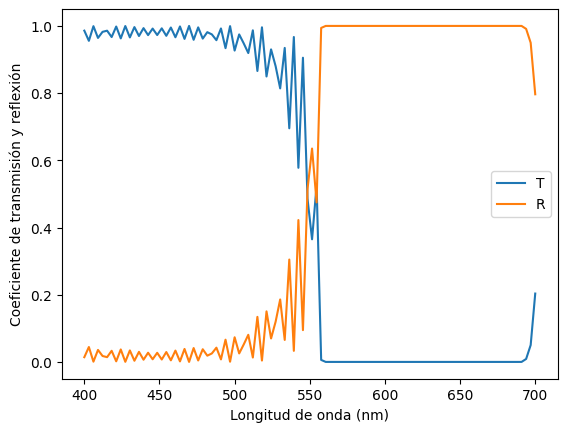

0.2034755059623007


In [15]:
wavelens = np.linspace(400, 700, 100)

T = []
R = []

for wavel in wavelens:
    t, r = multicapaperiodo(50, n0, n1, n2, d1, d2, wavel)
    T.append(t)
    R.append(r)

plt.plot(wavelens, T, label = 'T')
plt.plot(wavelens, R, label = 'R')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Coeficiente de transmisión y reflexión')
plt.legend()
plt.show()

print(T[-1])